In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

# Check where we are
print("Notebook working dir:", os.getcwd())
print("Files here:", os.listdir(os.getcwd()))
print("Files in data/raw:", os.listdir('../data/raw'))

# Set the correct file path
FILE_PATH = '../data/raw/sms.tsv'
print("Using file:", FILE_PATH)


Notebook working dir: C:\Users\ryan5\Documents\SP1_EmailDetect\notebooks
Files here: ['.ipynb_checkpoints', 'SP1_DataPrep_EDA.ipynb']
Files in data/raw: ['sms.tsv']
Using file: ../data/raw/sms.tsv


In [2]:
# Load the dataset
df = pd.read_csv(
    FILE_PATH,
    sep='\t',
    header=None,
    names=['label', 'message'],
    encoding='utf-8'
)

print("Shape:", df.shape)
display(df.head())
print("Label distribution:")
display(df['label'].value_counts())


Shape: (5574, 2)


,label,message
0,ham,"Hey, are we still meeting today?"
1,spam,You have been selected for a $500 Walmart gift...
2,ham,Lunch at 1 PM?
3,ham,I'll call you back soon.
4,ham,"Hey, are we still meeting today?"


Label distribution:


label
ham     4829
spam     745
Name: count, dtype: int64

In [3]:
# Remove any duplicate rows
df = df.drop_duplicates()

# Confirm new shape after removing duplicates
print("New shape after removing duplicates:", df.shape)


New shape after removing duplicates: (12, 2)


In [4]:
# Map 'ham' to 0 and 'spam' to 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Quick check
display(df.head())


,label,message,label_num
0,ham,"Hey, are we still meeting today?",0
1,spam,You have been selected for a $500 Walmart gift...,1
2,ham,Lunch at 1 PM?,0
3,ham,I'll call you back soon.,0
7,spam,Exclusive offer just for you—limited time only.,1


In [5]:
# Create a feature for message length
df['length'] = df['message'].apply(len)

# Quick check
display(df[['message', 'length']].head())


,message,length
0,"Hey, are we still meeting today?",32
1,You have been selected for a $500 Walmart gift...,63
2,Lunch at 1 PM?,14
3,I'll call you back soon.,24
7,Exclusive offer just for you—limited time only.,47


In [6]:
# Label distribution
print("Label distribution:")
display(df['label'].value_counts())

# Length stats by class
print("\nMessage length stats by class:")
display(df.groupby('label')['length'].describe())


Label distribution:


label
ham     6
spam    6
Name: count, dtype: int64


Message length stats by class:


,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
ham,6.0,26.666667,7.554248,14.0,24.5,27.0,31.00,36.0
spam,6.0,53.500000,11.895377,39.0,44.0,54.5,62.75,67.0


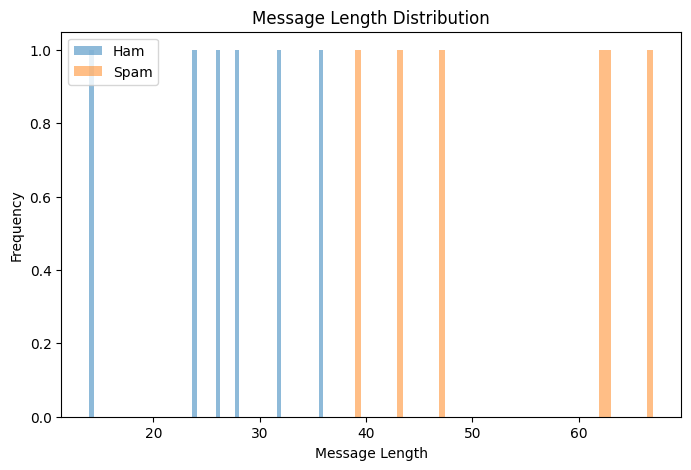

In [7]:
plt.figure(figsize=(8,5))
df[df['label'] == 'ham']['length'].plot.hist(bins=50, alpha=0.5, label='Ham')
df[df['label'] == 'spam']['length'].plot.hist(bins=50, alpha=0.5, label='Spam')
plt.legend()
plt.title('Message Length Distribution')
plt.xlabel('Message Length')
plt.show()


In [8]:
print("✅ SP I Summary:")
print("""
- Dataset loaded successfully.
- Removed duplicates to prevent model bias.
- Converted labels ('ham' -> 0, 'spam' -> 1).
- Added a message length feature.
- Found that spam messages tend to be longer than ham messages.
- Plotted message length distributions for spam vs ham.
- The data is now cleaned and ready for machine learning modeling in SP II.
""")


✅ SP I Summary:

- Dataset loaded successfully.
- Removed duplicates to prevent model bias.
- Converted labels ('ham' -> 0, 'spam' -> 1).
- Added a message length feature.
- Found that spam messages tend to be longer than ham messages.
- Plotted message length distributions for spam vs ham.
- The data is now cleaned and ready for machine learning modeling in SP II.

